In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from linearmodels.iv import IV2SLS
import functions as fun
import statsmodels.formula.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

/Users/mikkeldollerup/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/mikkeldollerup/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/var/folders/ys/szn3cjzn7zg_mdp21slh2_hr0000gn/T/ipykernel_47204/1210242844.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was too old on your system - pyarrow 10.0.1 is the current minimum supported version as of this release.
If this would cause problems for you,
please provide us fe

In [2]:
df = pd.read_csv('dataset.csv')
Nobs=df['ID'].count()
df['Intercept']=np.ones((Nobs,1))
df.rename(columns={'Market share':'Market_share'}, inplace=True)
df2 = df[df['Market_share'] != 0]

df2.head(20)

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales,Intercept
8,1,2021,0.010373,Aiways,U5,400,284621.700,201,34,SUV,C,CN,257,1.0
9,1,2022,0.005976,Aiways,U5,400,313681.829,201,34,SUV,C,CN,183,1.0
10,1,2023,0.002860,Aiways,U5,400,264524.000,201,34,SUV,C,CN,177,1.0
21,2,2023,0.000048,Aiways,U6,405,360638.000,214,34,SUV,C,CN,3,1.0
28,3,2019,0.040630,Audi,e-tron,375,979704.475,402,17,SUV,F,DE,222,1.0
29,3,2020,0.034680,Audi,e-tron,375,890101.410,402,17,SUV,F,DE,491,1.0
30,3,2021,0.010494,Audi,e-tron,375,800035.193,402,17,SUV,F,DE,260,1.0
31,3,2022,0.017570,Audi,e-tron,375,789723.656,402,17,SUV,F,DE,538,1.0
32,3,2023,0.001099,Audi,e-tron,375,673037.728,402,17,SUV,F,DE,68,1.0
41,4,2021,0.003391,Audi,e-tron GT,472,1278896.110,522,17,Sedan,F,DE,84,1.0


In [3]:
# Copy the dataframe
data = df2.copy().reset_index(drop=True)
data.head(20)

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales,Intercept
0,1,2021,0.010373,Aiways,U5,400,284621.700,201,34,SUV,C,CN,257,1.0
1,1,2022,0.005976,Aiways,U5,400,313681.829,201,34,SUV,C,CN,183,1.0
2,1,2023,0.002860,Aiways,U5,400,264524.000,201,34,SUV,C,CN,177,1.0
3,2,2023,0.000048,Aiways,U6,405,360638.000,214,34,SUV,C,CN,3,1.0
4,3,2019,0.040630,Audi,e-tron,375,979704.475,402,17,SUV,F,DE,222,1.0
5,3,2020,0.034680,Audi,e-tron,375,890101.410,402,17,SUV,F,DE,491,1.0
6,3,2021,0.010494,Audi,e-tron,375,800035.193,402,17,SUV,F,DE,260,1.0
7,3,2022,0.017570,Audi,e-tron,375,789723.656,402,17,SUV,F,DE,538,1.0
8,3,2023,0.001099,Audi,e-tron,375,673037.728,402,17,SUV,F,DE,68,1.0
9,4,2021,0.003391,Audi,e-tron GT,472,1278896.110,522,17,Sedan,F,DE,84,1.0


In [4]:
#Scale for better intepretation

data['Price'] = data['Price']/10_000 #(Change in ms(%) for change in pris in 10.000)
data['HP'] = data['HP']/10           #(Change in ms(%) for change in HP in 10)
data['Range'] = data['Range']/10     #(Change in ms(%) for change in rækkevidde in 10)

In [5]:
# Creating dummy for china
data['China'] = (data['Country'] == 'CN').astype(int)

# IV

In [6]:
fun.GH(data, 'Range', 0.5)
fun.GH(data, 'HP', 0.5)
fun.GH(data, 'Chargetime', 0.5)

/Users/mikkeldollerup/Documents/GitHub/Bachelor/functions.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1499.9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, instrument + '_GH'] = sum_except_current
/Users/mikkeldollerup/Documents/GitHub/Bachelor/functions.py:267: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '740.5000000000001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, instrument + '_GH'] = sum_except_current


,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales,Intercept,China,Range_GH,HP_GH,Chargetime_GH
0,1,2021,0.010373,Aiways,U5,40.0,28.462170,20.1,34,SUV,C,CN,257,1.0,1,1499.9,740.5,1317
1,1,2022,0.005976,Aiways,U5,40.0,31.368183,20.1,34,SUV,C,CN,183,1.0,1,2153.5,1060.2,1796
2,1,2023,0.002860,Aiways,U5,40.0,26.452400,20.1,34,SUV,C,CN,177,1.0,1,2792.3,1501.0,2099
3,2,2023,0.000048,Aiways,U6,40.5,36.063800,21.4,34,SUV,C,CN,3,1.0,1,2746.8,1456.2,2099
4,3,2019,0.040630,Audi,e-tron,37.5,97.970447,40.2,17,SUV,F,DE,222,1.0,0,470.9,310.5,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,189,2023,0.000065,Volvo,EX30,47.5,36.824500,26.8,28,SUV,B,SE,4,1.0,0,2189.4,1777.6,1813
330,190,2021,0.014652,Volvo,XC40,45.7,46.206060,40.2,28,SUV,C,SE,363,1.0,0,1169.9,1026.5,1138
331,190,2022,0.033310,Volvo,XC40,45.7,41.626340,40.2,28,SUV,C,SE,1020,1.0,0,1702.8,1621.7,1483
332,190,2023,0.031752,Volvo,XC40,45.7,43.926660,40.2,28,SUV,C,SE,1965,1.0,0,2206.7,1978.6,1813


In [7]:
formula = 'np.log(Market_share) ~ 1 + [Price ~ Range_GH + HP_GH + Chargetime_GH] + Range + HP + Chargetime + China '
IV = IV2SLS.from_formula(formula, data).fit(cov_type='robust')
IV.summary#.tables[1]

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                           IV-2SLS Estimation Summary                           
================================================================================
Dep. Variable:     np.log(Market_share)   R-squared:                     -1.1894
Estimator:                      IV-2SLS   Adj. R-squared:                -1.2228
No. Observations:                   334   F-statistic:                    73.809
Date:                  Thu, May 23 2024   P-value (F-stat)                0.0000
Time:                          15:34:21   Distribution:                  chi2(5)
Cov. Estimator:                  robust                                         
                                                                                
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -4.6767     1.4901    -3.1386     0.0017     -7.5972     -1.7562
Range          0.1395     0.0231     6.0487     0.0000      0.0943      0.1847
HP             0.1587     0.0585     2.7127     0.0067      0.0440      0.2734
Chargetime    -0.0478     0.0201    -2.3749     0.0176     -0.0872     -0.0083
China         -3.7943     0.6345    -5.9798     0.0000     -5.0380     -2.5507
Price         -0.1722     0.0448    -3.8463     0.0001     -0.2599     -0.0844
==============================================================================

Endogenous: Price
Instruments: Range_GH, HP_GH, Chargetime_GH
Robust Covariance (Heteroskedastic)
Debiased: False
"""

# Willingness to pay

In [8]:
alpha = IV.params[-1] # Price coefficient
beta = IV.params[:-1]
beta_alpha_ratio = [b / -alpha for b in beta[1:]] #Willingness to pay (excluding constant)

for i in range(len(IV.params.index[1:-1])): #[1:-1] to exclude constant and price
    print('W2P:', IV.params.index[1:-1][i], beta_alpha_ratio[i])

W2P: Range 0.8102751985243255
W2P: HP 0.9217635970210817
W2P: Chargetime -0.2773644277316249
W2P: China -22.036887734646204


/var/folders/ys/szn3cjzn7zg_mdp21slh2_hr0000gn/T/ipykernel_47204/4182797252.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = IV.params[-1] # Price coefficient


NOTE: English delimiter\
8,102 DKK for every 10 increase in Range\
9,217 DKK for every 10 increase in HP\
-2,773 DKK for every 10 increase in Chargetime\
-220,368 DKK for Chinese cars OR -22,036 DKK for Chinese cars???

# Logit

In [9]:
# IMPORTANT: The data must be sorted by year and ID before running the function
#             Because the CCPs returned by the function are sorted by year and ID
logit_data = data.sort_values(['Year', 'ID']).reset_index(drop=True)
X = logit_data[['Intercept', 'Range', 'HP', 'Chargetime', 'China']]
p_j = logit_data['Price']
logit_data['CCP'] = fun.ccp(alpha, beta, data, X)

In [10]:
probability_ratio = fun.probability_ratio(logit_data, 2023)
probability_ratio

Model,U5,U6,e-tron,e-tron GT,Q4 e-tron,Q8 e-tron,I3,i4,i5,I7,...,ID.3,ID.4,ID.5,ID.7,ID.Buzz,up!,C40,EX30,XC40,Free
Model,,,,,,,,,,,,,,,,,,,,,
U5,1.0,3.970191,0.661227,309.46,1.099154,3.547225,0.191381,0.166703,0.64086,18611907.065377,...,0.056947,0.016675,0.012484,0.015862,1.383754,0.469459,0.004839,0.01222,0.006362,0.488975
U6,0.251877,1.0,0.166548,77.945872,0.276852,0.893465,0.048205,0.041989,0.161418,4687912.269659,...,0.014344,0.0042,0.003144,0.003995,0.348536,0.118246,0.001219,0.003078,0.001602,0.123162
e-tron,1.51234,6.004278,1.0,468.008664,1.662295,5.364609,0.289434,0.252111,0.969199,28147527.162204,...,0.086123,0.025218,0.018879,0.023988,2.092706,0.709982,0.007318,0.018481,0.009621,0.739496
e-tron GT,0.003231,0.012829,0.002137,1.0,0.003552,0.011463,0.000618,0.000539,0.002071,60143.17542,...,0.000184,0.000054,0.00004,0.000051,0.004472,0.001517,0.000016,0.000039,0.000021,0.00158
Q4 e-tron,0.90979,3.612042,0.601578,281.543726,1.0,3.227231,0.174117,0.151665,0.583049,16932933.671992,...,0.05181,0.015171,0.011357,0.014431,1.258926,0.427109,0.004402,0.011118,0.005788,0.444865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
up!,2.130111,8.456949,1.408487,659.18427,2.341321,7.555984,0.407664,0.355095,1.365104,39645435.162622,...,0.121303,0.035519,0.026591,0.033787,2.947549,1.0,0.010307,0.02603,0.013552,1.041571
C40,206.66263,820.49011,136.650926,63953.817335,227.15412,733.078856,39.551383,34.451229,132.441875,3846385654.777198,...,11.768748,3.44605,2.579877,3.278012,285.970167,97.019635,1.0,2.525395,1.314776,101.05281
EX30,81.83377,324.895698,54.110705,25324.278572,89.947942,290.2828,15.661461,13.641915,52.444015,1523082528.524133,...,4.66016,1.364558,1.021574,1.298019,113.237778,38.417601,0.395978,1.0,0.520622,40.014648


In [11]:
logit_data['Model_year'] = logit_data['Model'] + '_' + logit_data['Year'].astype(str)
marginal_effects = fun.marginal_effects(logit_data, IV)
marginal_effects

/Users/mikkeldollerup/Documents/GitHub/Bachelor/functions.py:117: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  marginal_effects.iloc[i,j] = coefficients[j]*ccp[i]*(1-ccp[i]) #dv/dz*P_i*(1-P_i)


,Intercept,Range,HP,Chargetime,China,Price
Model_year,,,,,,
I3_2013,-0.098474,0.002938,0.003342,-0.001006,-0.079895,-0.003625
Leaf_2013,-0.032786,0.000978,0.001113,-0.000335,-0.0266,-0.001207
Zoe_2013,-0.094815,0.002829,0.003218,-0.000968,-0.076926,-0.003491
Fortwo_2013,-0.000645,0.000019,0.000022,-0.000007,-0.000524,-0.000024
Model S_2013,-0.231587,0.006909,0.007859,-0.002365,-0.187892,-0.008526
...,...,...,...,...,...,...
up!_2023,-0.001102,0.000033,0.000037,-0.000011,-0.000894,-0.000041
C40_2023,-0.104451,0.003116,0.003545,-0.001067,-0.084744,-0.003846
EX30_2023,-0.041945,0.001251,0.001423,-0.000428,-0.034031,-0.001544


In [12]:
marginal_effects[IV.params.index].mean()

Intercept    -0.090564
Range         0.002702
HP            0.003073
Chargetime   -0.000925
China        -0.073477
Price        -0.003334
dtype: object

In [13]:
elasticity = fun.elasticity(logit_data, IV)
elasticity

/Users/mikkeldollerup/Documents/GitHub/Bachelor/functions.py:168: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elasticity.iloc[i,j] = ((coefficients[j])*X.iloc[i,j]*(1 - ccp[i]))


,Intercept,Range,HP,Chargetime,China,Price
Model_year,,,,,,
I3_2013,-4.576045,4.027078,2.593412,-0.841122,-0.0,-4.211875
Leaf_2013,-4.643666,4.543731,2.316558,-2.039039,-0.0,-4.337201
Zoe_2013,-4.579865,4.986816,2.082679,-2.619007,-0.0,-2.91958
Fortwo_2013,-4.676039,1.771575,1.269501,-2.865005,-0.0,-3.623162
Model S_2013,-0.244354,0.44393,0.559742,-0.074858,-0.0,-0.647342
...,...,...,...,...,...,...
up!_2023,-4.675583,3.570701,1.285244,-2.29178,-0.0,-3.009914
C40_2023,-4.56979,6.352724,6.234292,-1.306623,-0.0,-7.245711
EX30_2023,-4.634357,6.566907,4.214917,-1.325084,-0.0,-6.283065


In [14]:
elasticity[IV.params.index].mean()

Intercept    -4.522662
Range         5.275402
HP            3.780338
Chargetime   -1.581019
China        -0.442494
Price        -7.780701
dtype: object

# Analysis on subsample

### The subsample consists of the 2023 market with:
The 5 highest market share models: Model Y, Model 3, Enyag iV, ID.4 and Q4 e-tron\
The 5 highest market share chinese models: 4, Euniq6, Atto 3, Marvel R and Dolphin\
The highest ccp model: Ocean\
The highest ccp chinese model: Seal\
The highest ccp korean model (so we have models outside EU, US and china): Ioniq 6\
The highest priced model: I7\
Polestar 2 as a random interest


In [15]:
analysis_data = logit_data[logit_data['Year']==2023].copy()
analysis_data = analysis_data[analysis_data['Model'].isin(['I7', 'Model 3', 'Model Y', 'ID.4', 'Enyaq iV', 'Ocean' , '2', 'Ioniq 6', 'Q4 e-tron'
                                                           , '4', 'Euniq6', 'Atto 3', 'Marvel R', 'Dolphin', 'Seal'])]
analysis_data.reset_index(drop=True, inplace=True)
analysis_data

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country,Sales,Intercept,China,Range_GH,HP_GH,Chargetime_GH,CCP,Model_year
0,5,2023,0.037958,Audi,Q4 e-tron,49.6,65.855307,28.1,28,SUV,C,DE,2349,1.0,0,2315.6,1725.6,1813,1.006226e-04,Q4 e-tron_2023
1,13,2023,0.000679,BMW,I7,60.1,186.519444,44.9,28,Sedan,F,DE,42,1.0,0,3748.1,1894.3,1813,5.942419e-12,I7_2023
2,17,2023,0.003587,BYD,Atto 3,42.0,31.000000,20.1,37,SUV,C,CN,222,1.0,1,2569.2,1501.0,2195,5.789713e-05,Atto 3_2023
3,18,2023,0.003280,BYD,Dolphin,42.7,23.323517,9.3,40,Hatchback,C,CN,203,1.0,1,2605.7,2235.6,2006,3.736496e-05,Dolphin_2023
4,20,2023,0.000517,BYD,Seal,54.0,32.062000,52.2,38,Sedan,D,CN,32,1.0,1,2900.5,2103.5,2184,4.000624e-02,Seal_2023
5,49,2023,0.004686,Fisker,Ocean,70.0,60.237920,56.3,35,SUV,D,DK,290,1.0,0,4079.7,2167.7,2066,2.866346e-01,Ocean_2023
6,69,2023,0.003199,Hyundai,Ioniq 6,56.7,43.629166,32.0,16,Sedan,D,KR,198,1.0,0,3065.5,1958.7,3157,4.098131e-02,Ioniq 6_2023
7,100,2023,0.003991,Maxus,Euniq6,35.4,37.950676,17.4,45,MPV,M,CN,247,1.0,1,3271.4,1752.3,2407,3.097333e-06,Euniq6_2023
8,117,2023,0.011990,MG,4,42.7,26.589191,24.1,41,Hatchback,C,CN,742,1.0,1,2605.7,1700.9,2054,2.126383e-04,4_2023
9,119,2023,0.003361,MG,Marvel R,38.8,30.235650,17.7,38,SUV,C,CN,208,1.0,1,3041.5,1752.3,2184,2.752711e-05,Marvel R_2023


In [16]:
cross_elasticity = fun.cross_elasticity_1(analysis_data, IV)
cross_elasticity

/Users/mikkeldollerup/Documents/GitHub/Bachelor/functions.py:226: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cross_elasticity_table.loc[(model_labels[i], model_labels[j], X.columns[k]), 'Cross_Elasticity'] = -coefficients[k] * X.iloc[j, k] * ccp.iloc[j]
/Users/mikkeldollerup/Documents/GitHub/Bachelor/functions.py:226: PerformanceWarning: indexing past lexsort depth may impact performance.
  cross_elasticity_table.loc[(model_labels[i], model_labels[j], X.columns[k]), 'Cross_Elasticity'] = -coefficients[k] * X.iloc[j, k] * ccp.iloc[j]


Cross_Elasticity
Model_year     Model_year                                
Q4 e-tron_2023 Q4 e-tron_2023 Intercept          0.000471
                              Range             -0.000696
                              HP                -0.000449
                              Chargetime         0.000135
                              China                   0.0
...                                                   ...
ID.4_2023      ID.4_2023      Range             -0.046453
                              HP                 -0.02958
                              Chargetime         0.008869
                              China                   0.0
                              Price              0.047983

[1350 rows x 1 columns]

# Cost

In [17]:
logit_data['Cost']=fun.cost_original(logit_data, alpha)
logit_data.sort_values('Cost', ascending=False).head(20)

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,...,Country,Sales,Intercept,China,Range_GH,HP_GH,Chargetime_GH,CCP,Model_year,Cost
159,13,2022,0.000229,BMW,I7,60.1,194.052120,44.9,28,Sedan,...,DE,7,1.0,0,3017.6,1522.6,1483,6.841050e-12,I7_2022,194.052120
243,13,2023,0.000679,BMW,I7,60.1,186.519444,44.9,28,Sedan,...,DE,42,1.0,0,3748.1,1894.3,1813,5.942419e-12,I7_2023,186.519444
286,113,2023,0.001163,Mercedes-Benz,EQS SUV,57.9,158.465117,35.5,33,SUV,...,DE,72,1.0,0,3426.3,1791.2,1651,9.702177e-11,EQS SUV_2023,158.465117
192,113,2022,0.000098,Mercedes-Benz,EQS SUV,57.9,158.465117,35.5,33,SUV,...,DE,3,1.0,0,2802.3,1409.4,1460,4.086006e-10,EQS SUV_2022,158.465117
191,112,2022,0.004703,Mercedes-Benz,EQS,67.7,153.501316,35.5,28,Sedan,...,DE,144,1.0,0,3190.3,1409.4,1483,4.785861e-09,EQS_2022,153.501316
285,112,2023,0.001131,Mercedes-Benz,EQS,67.7,148.186989,35.5,28,Sedan,...,DE,70,1.0,0,4079.7,1791.2,1813,2.837392e-09,EQS_2023,148.186989
123,112,2021,0.000686,Mercedes-Benz,EQS,67.7,135.993900,35.5,28,Sedan,...,DE,17,1.0,0,2123.6,854.3,1138,9.596106e-08,EQS_2021,135.993899
85,150,2020,0.022885,Porsche,Taycan,44.7,135.084700,40.2,17,Sedan,...,DE,324,1.0,0,875.7,518.1,1085,3.294804e-08,Taycan_2020,135.084700
155,4,2022,0.002090,Audi,e-tron GT,47.2,128.731850,52.2,17,Sedan,...,DE,64,1.0,0,1708.1,1804.5,2596,4.669518e-07,e-tron GT_2022,128.731847
318,174,2023,0.000937,Tesla,Model X,52.9,128.467900,67.5,30,SUV,...,US,58,1.0,0,2770.4,2400.1,1653,1.566368e-06,Model X_2023,128.467891


In [18]:
logit_data[logit_data['Cost']>logit_data['Price']]

,ID,Year,Market_share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,...,Country,Sales,Intercept,China,Range_GH,HP_GH,Chargetime_GH,CCP,Model_year,Cost


In [19]:
len(logit_data[logit_data['Cost']<0])

0

In [20]:
cost_description = logit_data['Cost'].describe()

print(cost_description)

count    334.000000
mean      46.719848
std       29.947197
min       12.478021
25%       28.335444
50%       35.766273
75%       52.953630
max      194.052120
Name: Cost, dtype: float64


In [21]:
price_description = logit_data['Price'].describe()

print(price_description)

count    334.000000
mean      46.911125
std       29.974537
min       12.486400
25%       28.397813
50%       35.904451
75%       52.961690
max      194.052120
Name: Price, dtype: float64


/Users/mikkeldollerup/Documents/GitHub/Bachelor/functions.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '24.8750177240801' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.at[car, 'firm_cost'] = dataset.at[car, 'Price'] + (total_share / alpha)


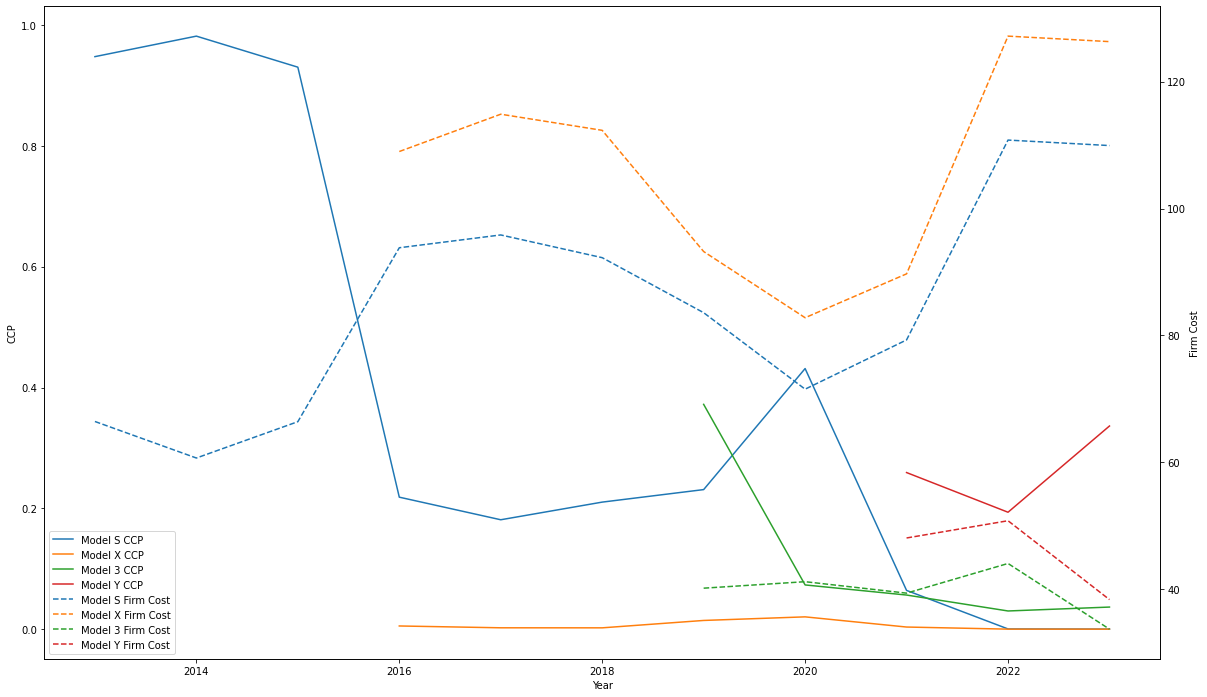

In [42]:
fun.cost_firm(logit_data, alpha)
logit_data['firm_cost'].describe()
logit_data[logit_data['Manufacturer'] == 'Tesla']

logit_data_tesla = logit_data[logit_data['Manufacturer'] == 'Tesla']
unique_models = logit_data_tesla['Model'].unique()


fig, ax1 = plt.subplots(figsize=(20, 12))  #størrelse


for model in unique_models:

    model_data = logit_data_tesla[logit_data_tesla['Model'] == model]
    
    year = model_data['Year'].values
    ccp = model_data['CCP'].values
    firm_cost = model_data['firm_cost'].values
      
    ax1.plot(year, ccp, label=f'{model} CCP')


ax2 = ax1.twinx()

#cost line
for model in unique_models:
    
    model_data = logit_data_tesla[logit_data_tesla['Model'] == model]
    
    year = model_data['Year'].values
    firm_cost = model_data['firm_cost'].values
    
    ax2.plot(year, firm_cost, linestyle='--', label=f'{model} Firm Cost')

ax1.set_xlabel('Year')
ax1.set_ylabel('CCP')
ax2.set_ylabel('Firm Cost')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower left')
plt.show()


In [23]:
OLS = sm.ols('firm_cost ~ Price + Range + HP + Chargetime + China', logit_data).fit(cov_type='HC3')
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              firm_cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.532e+05
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        15:34:22   Log-Likelihood:                -319.26
No. Observations:                 334   AIC:                             650.5
Df Residuals:                     328   BIC:                             673.4
Df Model:                           5                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4830      0.152      3.177      0.001       0.185       0.781
Price          1.0140      0.002    435.468      0.000       1.009       1.019
Range         -0.0146      0.005     -3.169      0.002      -0.024      -0.006
HP            -0.0377      0.007     -5.543      0.000      -0.051      -0.024
Chargetime    -0.0009      0.003     -0.344      0.731      -0.006       0.004
China          0.6490      0.114      5.683      0.000       0.425       0.873
==============================================================================
Omnibus:                      204.000   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1801.799
Skew:                          -2.452   Prob(JB):                         0.00
Kurtosis:                      13.267   Cond. No.                         450.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""